In [1]:
import site
import os
site.addsitedir(os.getcwd().rsplit('\\',1)[0] + '\\')  # so that this file can import stuff without it being in site-packages

In [2]:
# this file tests that given activations are working both as layers as well as activation functions withing a layer

from dl4seq import Model
from dl4seq.utils import make_model
import tensorflow as tf

import pandas as pd
import numpy as np

%matplotlib inline

tf.__version__


**********Pytorch models could not be imported **********



'2.1.0'

## Activation Layers

Following code shows how to use different activations as a keras [`layer`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer).

In [3]:
# create dummy data
i = np.linspace(-20, 20, 100)
o = i + 1
data = pd.DataFrame(np.concatenate([i.reshape(-1,1), o.reshape(-1, 1)], axis=1), columns=['input', 'output'])

data.head()

,input,output
0,-20.000000,-19.000000
1,-19.595960,-18.595960
2,-19.191919,-18.191919
3,-18.787879,-17.787879
4,-18.383838,-17.383838


In [4]:
layers = {"Input": {"config": {"shape": (1, ), "name": "CustomInputs"}}}

activation_layers = ['PRELU', "RELU", "TANH", "ELU", "LEAKYRELU", "THRESHOLDRELU", "SELU", 'sigmoid', 'hardsigmoid', 'crelu',
            'relu6', 'softmax', 'softplus', 'softsign', "SWISH"]

for lyr in activation_layers:
    layers[lyr] = {'config': {"name": lyr},
                   "inputs": "CustomInputs"}

layers["Concat"] = {"config": {"name": "concat"},
                    "inputs": activation_layers}
layers["Dense"] = {'config': {'units': 1}}


layers

{'Input': {'config': {'shape': (1,), 'name': 'CustomInputs'}},
 'PRELU': {'config': {'name': 'PRELU'}, 'inputs': 'CustomInputs'},
 'RELU': {'config': {'name': 'RELU'}, 'inputs': 'CustomInputs'},
 'TANH': {'config': {'name': 'TANH'}, 'inputs': 'CustomInputs'},
 'ELU': {'config': {'name': 'ELU'}, 'inputs': 'CustomInputs'},
 'LEAKYRELU': {'config': {'name': 'LEAKYRELU'}, 'inputs': 'CustomInputs'},
 'THRESHOLDRELU': {'config': {'name': 'THRESHOLDRELU'},
  'inputs': 'CustomInputs'},
 'SELU': {'config': {'name': 'SELU'}, 'inputs': 'CustomInputs'},
 'sigmoid': {'config': {'name': 'sigmoid'}, 'inputs': 'CustomInputs'},
 'hardsigmoid': {'config': {'name': 'hardsigmoid'}, 'inputs': 'CustomInputs'},
 'crelu': {'config': {'name': 'crelu'}, 'inputs': 'CustomInputs'},
 'relu6': {'config': {'name': 'relu6'}, 'inputs': 'CustomInputs'},
 'softmax': {'config': {'name': 'softmax'}, 'inputs': 'CustomInputs'},
 'softplus': {'config': {'name': 'softplus'}, 'inputs': 'CustomInputs'},
 'softsign': {'config': 

In [5]:
data_config, nn_config, _ = make_model(
    layers=layers,
    inputs = ['input'],
    outputs = ['output'],
    lookback=1,
    normalize=False,
    shuffle=False,
)


model = Model(data_config, nn_config, data=data)

model.build_nn()


building None layer based model
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
CustomInputs (InputLayer)       [(None, 1)]          0                                            
__________________________________________________________________________________________________
PRELU (PReLU)                   (None, 1)            1           CustomInputs[0][0]               
__________________________________________________________________________________________________
RELU (Activation)               (None, 1)            0           CustomInputs[0][0]               
__________________________________________________________________________________________________
TANH (Activation)               (None, 1)            0           CustomInputs[0]

input_X shape: (100, 1)
input_Y shape: (100, 1)
label_Y shape: (100, 1)


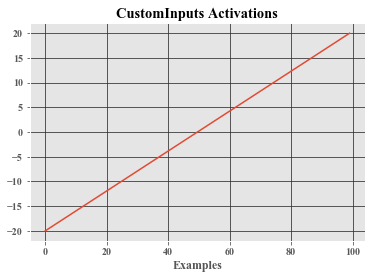

In [6]:
model.plot_activations(layer_names="CustomInputs", save=False)

input_X shape: (100, 1)
input_Y shape: (100, 1)
label_Y shape: (100, 1)


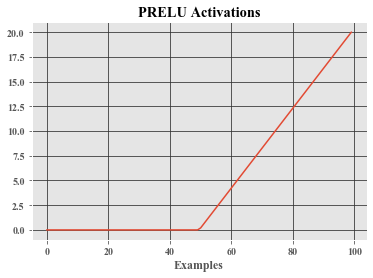

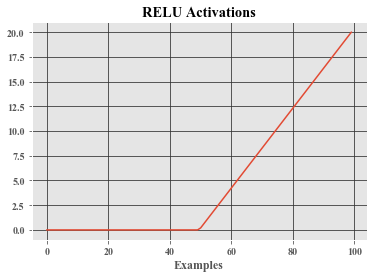

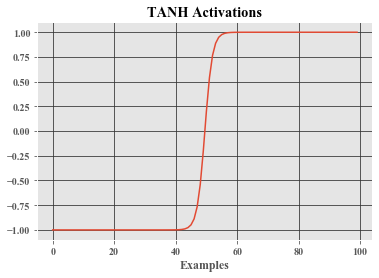

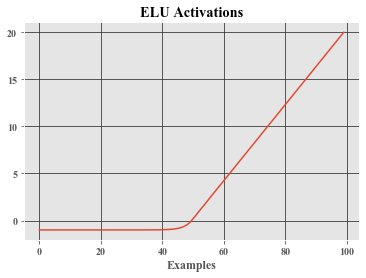

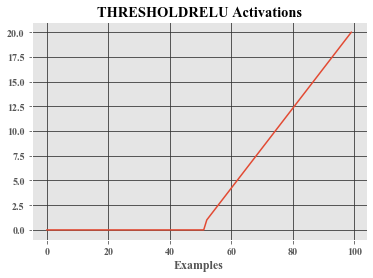

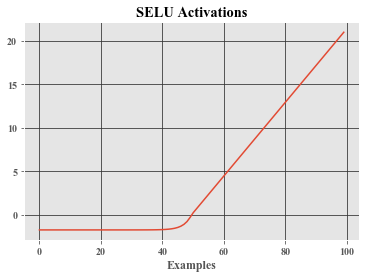

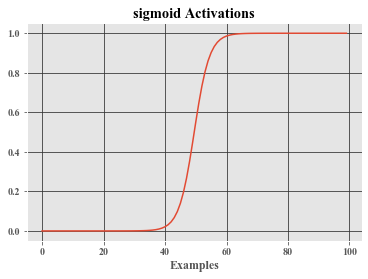

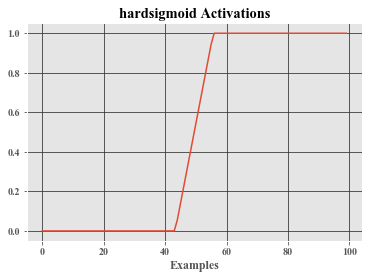

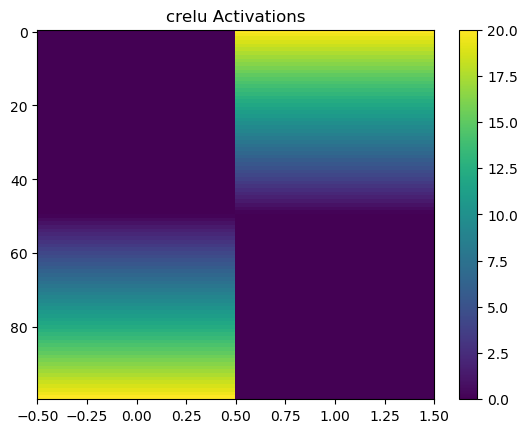

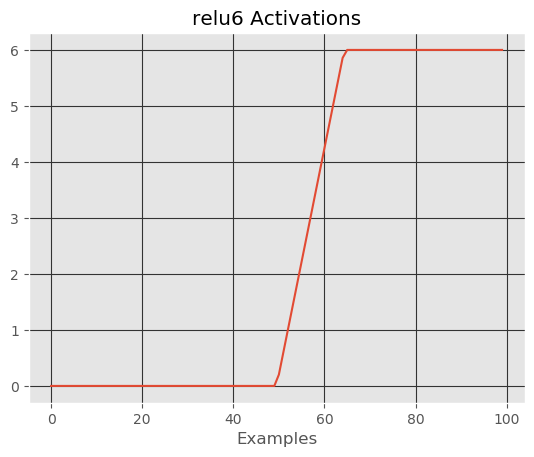

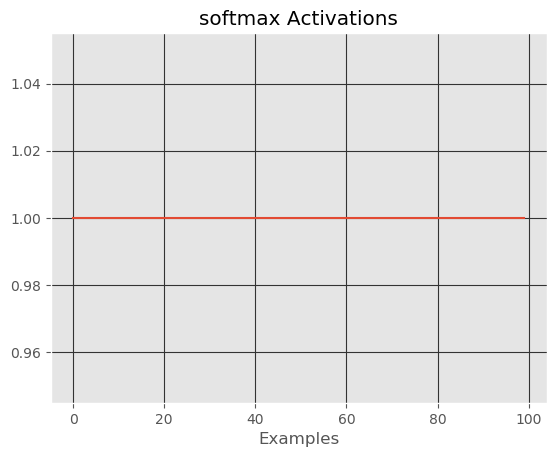

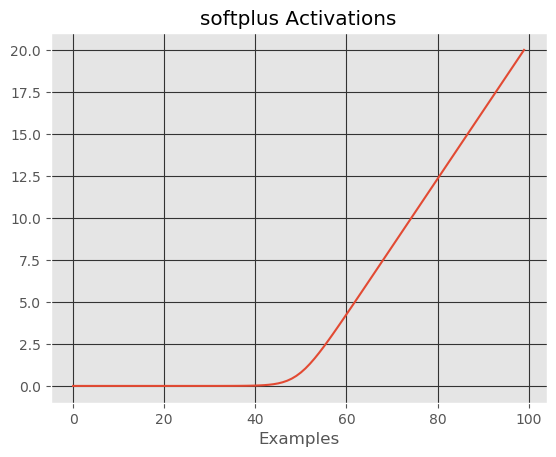

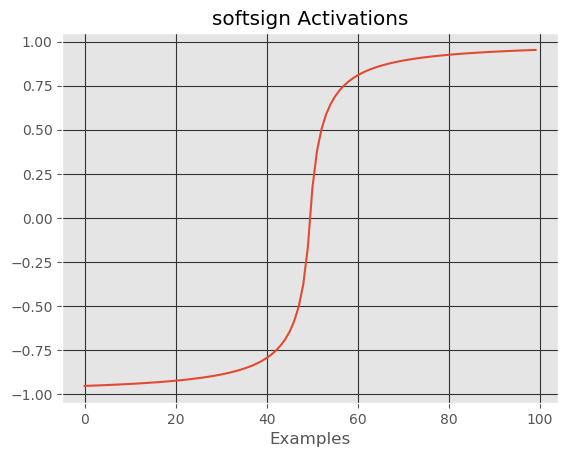

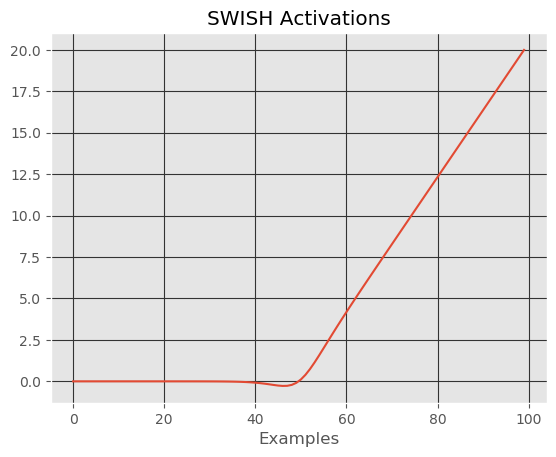

In [7]:
model.plot_activations(layer_names=activation_layers, save=False)

## Activation Functions
Following shows how to use different activation functions as `activation function` within a keras layer. Application of activation function within a layer can be different than application of activation as a layer depending upon the equation of the forward pass of that layer. For example, in [`LSTM`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM), there are two activation functions, and they are different than if we apply activation as a layer after `LSTM`. In `LSTM` the activation appear in the equations of LSTM. However the following cases show similar results to whe we used activation functions a layers (above). This is beacuse we are applying activation functions only on dense layer and are initializing the dense kerel as `ones`.

In [8]:
layers = {"Input": {"config": {"shape": (1, ), "name": "CustomInputs"}}}

activation_layers = []
for idx, act_fn in enumerate(['tanh', 'relu', 'elu', 'leakyrelu', 'crelu', 'selu', 'relu6', 'sigmoid',
                              'hardsigmoid', 'swish']):

    # initializing the kernel/weight matrix of each dense layer with ones, so that it does not affect first forward propagation
    layers["Dense_" + act_fn] = {'config': {'units': 1, 'activation': act_fn, "kernel_initializer": "ones", "name": act_fn},
                                   'inputs': "CustomInputs"}
    activation_layers.append(act_fn)

layers["Concat"] = {"config": {"name": "concat"},
                    "inputs": activation_layers}

layers["Dense"] = {'config': {'units': 1}}

layers

{'Input': {'config': {'shape': (1,), 'name': 'CustomInputs'}},
 'Dense_tanh': {'config': {'units': 1,
   'activation': 'tanh',
   'kernel_initializer': 'ones',
   'name': 'tanh'},
  'inputs': 'CustomInputs'},
 'Dense_relu': {'config': {'units': 1,
   'activation': 'relu',
   'kernel_initializer': 'ones',
   'name': 'relu'},
  'inputs': 'CustomInputs'},
 'Dense_elu': {'config': {'units': 1,
   'activation': 'elu',
   'kernel_initializer': 'ones',
   'name': 'elu'},
  'inputs': 'CustomInputs'},
 'Dense_leakyrelu': {'config': {'units': 1,
   'activation': 'leakyrelu',
   'kernel_initializer': 'ones',
   'name': 'leakyrelu'},
  'inputs': 'CustomInputs'},
 'Dense_crelu': {'config': {'units': 1,
   'activation': 'crelu',
   'kernel_initializer': 'ones',
   'name': 'crelu'},
  'inputs': 'CustomInputs'},
 'Dense_selu': {'config': {'units': 1,
   'activation': 'selu',
   'kernel_initializer': 'ones',
   'name': 'selu'},
  'inputs': 'CustomInputs'},
 'Dense_relu6': {'config': {'units': 1,
   'ac

In [9]:
nn_config['layers'] = layers

model = Model(data_config, nn_config, data=data)

model.build_nn()

building None layer based model
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
CustomInputs (InputLayer)       [(None, 1)]          0                                            
__________________________________________________________________________________________________
tanh (Dense)                    (None, 1)            2           CustomInputs[0][0]               
__________________________________________________________________________________________________
relu (Dense)                    (None, 1)            2           CustomInputs[0][0]               
__________________________________________________________________________________________________
elu (Dense)                     (None, 1)            2           CustomInputs[0][0]               
______________________________________________________________

input_X shape: (100, 1)
input_Y shape: (100, 1)
label_Y shape: (100, 1)


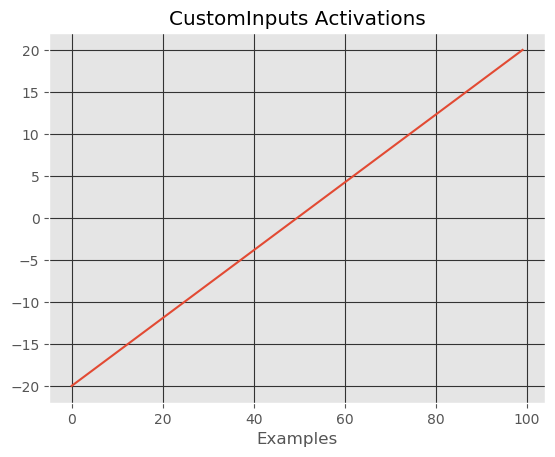

In [10]:
model.plot_activations(layer_names="CustomInputs", save=False)

input_X shape: (100, 1)
input_Y shape: (100, 1)
label_Y shape: (100, 1)


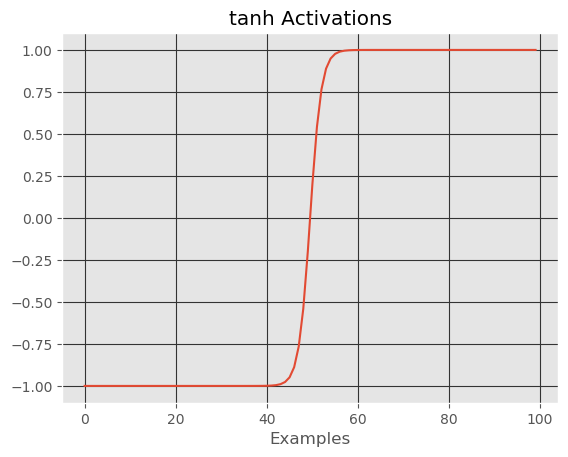

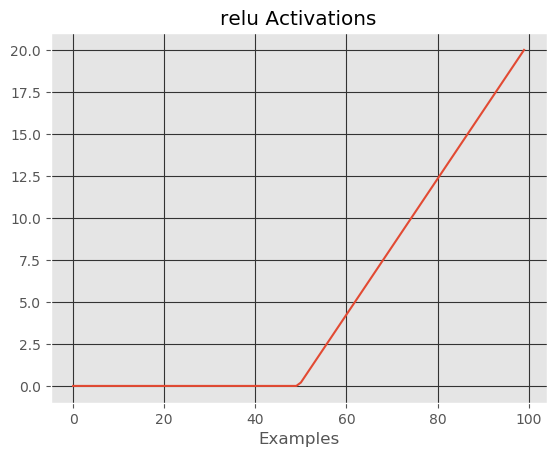

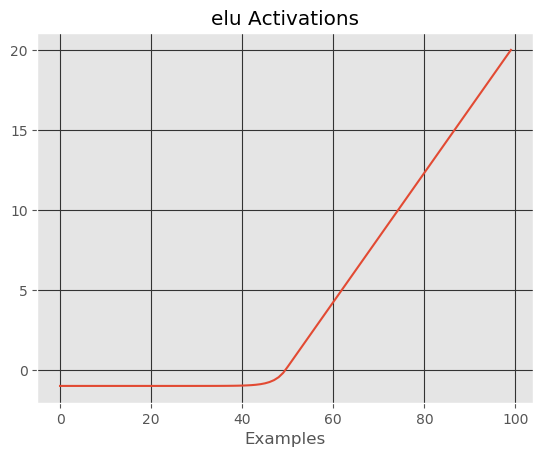

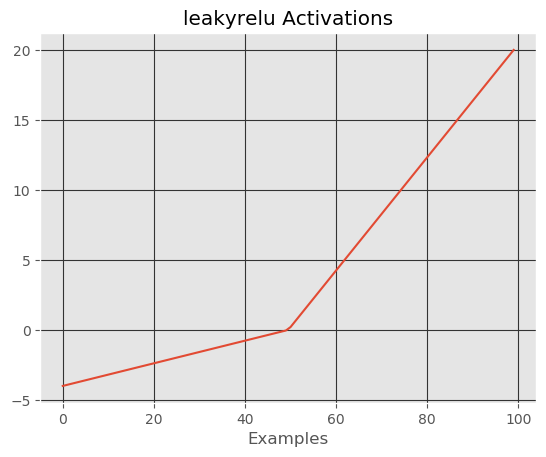

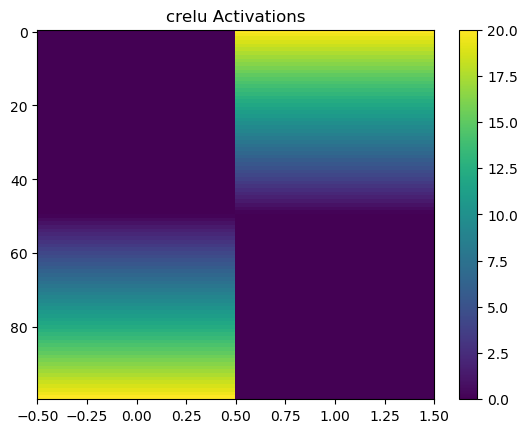

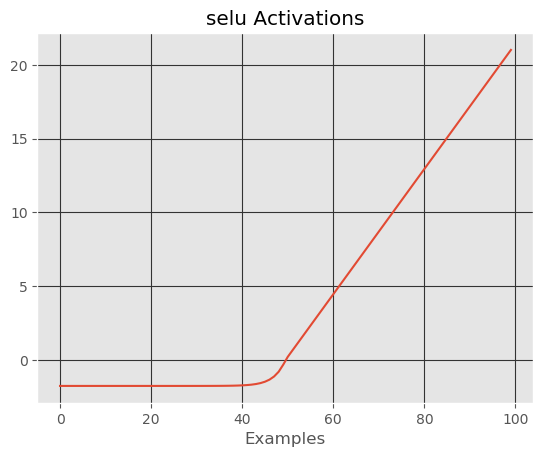

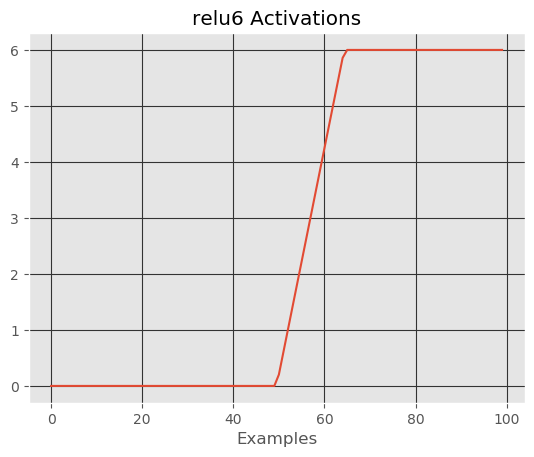

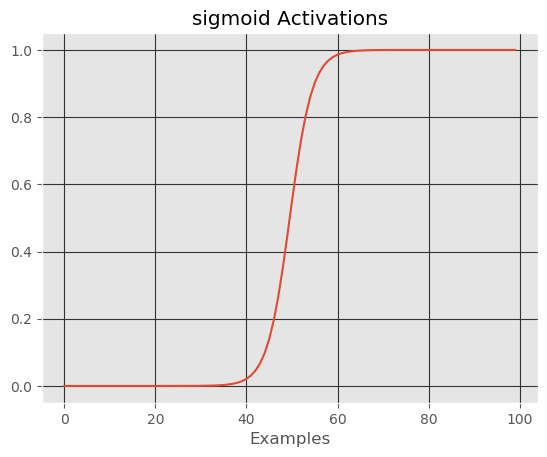

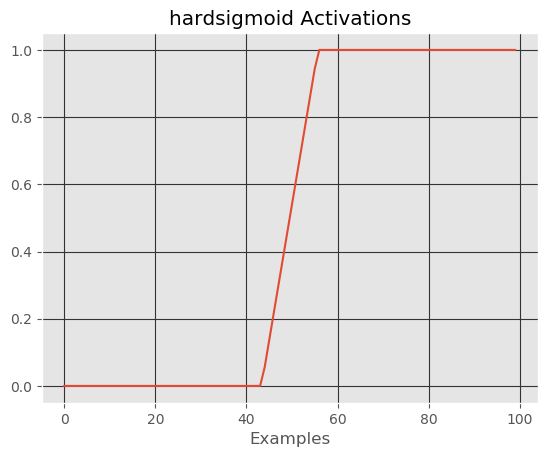

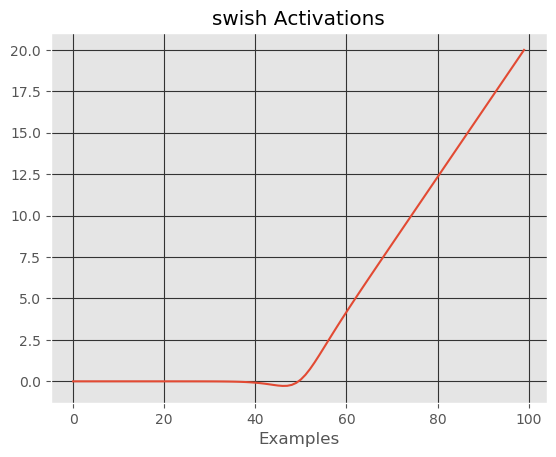

In [11]:
model.plot_activations(layer_names=activation_layers, save=False)